### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

### Set-up

For this expercise, we will utilize two files (listed below) from the 'Brazilian E-Commerce Public Dataset' originally posted on [Kaggle]( https://www.kaggle.com/olistbr/brazilian-ecommerce).

In [2]:
# Full path of the 'orders' dataset
orders_file = 'https://www.dropbox.com/s/ej64qorm1uvmjlp/olist_orders_dataset.csv?dl=1'

# Full path of the 'customer' dataset
cust_file = 'https://www.dropbox.com/s/t082qlggu4wxiq5/olist_customers_dataset.csv?dl=1'

# File output location (to export results)
out = r"C:\Users\jonathan\Downloads"

### Read data

In [8]:
# Read the csv file
orders_file_df = pd.read_csv(orders_file)
cust_file_df = pd.read_csv(cust_file)

# View top five rows
cust_file_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Check the size (rows and columns of the dataframe)
orders_file_df.shape


(99441, 8)

In [6]:
# Column names
orders_file_df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

For this exercise, we will use only four columns from this data frame: `order_id`, `customer_id`, `order_status`, `order_purchase_date`. Let's drop the other columns.

In [10]:
# Drop unnecessary columns

drop_vars = ['order_approved_at', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date']

orders_file_df = orders_file_df.drop(drop_vars, axis=1)



In [12]:
# Check column types
orders_file_df.dtypes



order_id                    object
customer_id                 object
order_status                object
order_purchase_timestamp    object
dtype: object

### Convert `order_purchase_timestamp` from `object` to `datetime`

In [68]:
# Date-time conversion
orders_file_df['order_purchase_timestamp'] = pd.to_datetime(orders_file_df['order_purchase_timestamp'])


# Check column types
orders_file_df.dtypes

order_id                            object
customer_id                         object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [20]:
orders_file_df['order_purchase_timestamp'].head()

0    2017-10-02
1    2018-07-24
2    2018-08-08
3    2017-11-18
4    2018-02-13
Name: order_purchase_timestamp, dtype: object

In [19]:
# For this exercise, we won't use the time-stamp
# Let's convert the order purchase timestamps into dates

orders_file_df['order_purchase_timestamp'] = orders_file_df['order_purchase_timestamp'].dt.date

### Daily order volumes

In [34]:
# Group by order date and count the number of orders (for each date)
order_counts = orders_file_df.groupby('order_purchase_timestamp')['order_id'].count()




In [45]:
order_counts.sort_values(0)

order_purchase_timestamp
2016-09-04       1
2018-10-03       1
2018-10-01       1
2018-09-29       1
2018-09-26       1
2018-09-25       1
2018-09-20       1
2018-09-17       1
2018-09-13       1
2018-09-12       1
2018-09-11       1
2018-09-10       1
2018-08-31       1
2018-10-16       1
2018-10-17       1
2016-10-02       1
2016-09-15       1
2016-10-22       1
2016-09-13       1
2016-12-23       1
2016-09-05       1
2018-09-06       3
2017-01-06       4
2017-01-07       4
2018-09-03       4
2018-08-30       4
2017-01-09       5
2017-01-08       6
2017-01-10       6
2016-10-03       8
              ... 
2018-08-02     302
2018-01-16     302
2018-03-19     303
2018-05-03     305
2018-07-18     307
2018-07-23     307
2018-01-15     307
2018-08-01     311
2018-02-28     313
2018-01-22     314
2018-08-03     314
2018-08-14     316
2018-08-08     316
2018-08-16     320
2018-07-31     322
2017-11-29     323
2018-05-08     331
2017-12-04     337
2018-05-09     344
2018-05-15     352
2018-0

The `groupby()` function with a summary function like `count()` returns an indexed pandas dataframe. 

**pandas** uses a similar structure like **SQL** for aggregating data. Here's an analogous SQL query:

`CREATE TABLE order_counts as`

`SELECT order_purchase_date, count(order_id)`

`FROM orders`

`GROUP BY order_purchase_date;`

Text(0.5, 0, 'Order Purchase Date')

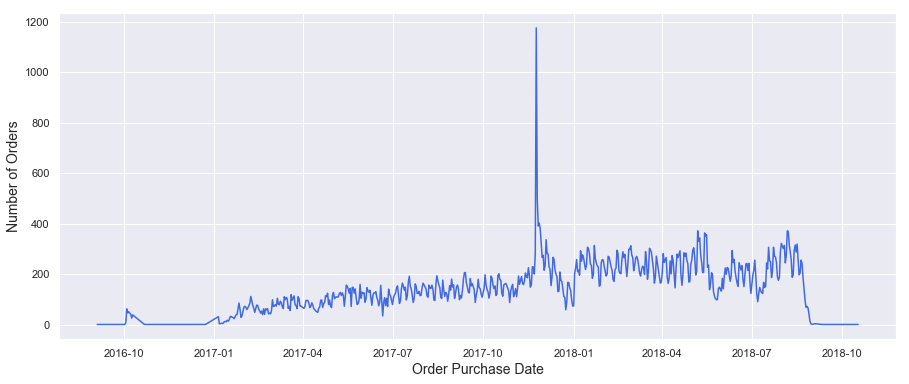

In [46]:
# Plot the daily order volume

#import matplotlib.pyplot as plt
#import seaborn as sns

# Set style
sns.set(style='darkgrid')

# Adjust the plot size
plt.figure(figsize=[15, 6])

# Line plot
sns.lineplot(x=order_counts.index, y=order_counts, color='royalblue')

# Assign axis labels
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14)

There's a huge spike in the number of orders sometime around November/December 2017. Let's identify that specific day.

In [60]:
# Find the date associated with the maximum daily order volume

#order_counts[order_counts==max(order_counts)]

order_counts.idxmax()



datetime.date(2017, 11, 24)

For this dataset, we don't know why there was this huge spike on 24-Nov-2017. In a real-world situation, this would be an opportunity to talk with the business owners to find out the reason(s) behind this apparent anomaly. Here are some potential reasons for this spike: a big one-day sale event, big product launch, platform launch (e.g., a new marketplace) on that day.

### Is there a monthly seasonality in the order volumes?

In [72]:
# Extract year from the order date

orders_file_df['order_year'] = orders_file_df['order_purchase_timestamp'].dt.year

orders_file_df['order_year'].value_counts()

2018    54011
2017    45101
2016      329
Name: order_year, dtype: int64

`value_counts()` sorts the results by using the counts in a descending order.

In [75]:
# Extract month from the order date
orders_file_df['order_month'] = orders_file_df['order_purchase_timestamp'].dt.month

# -- INSERT CODE HERE -- ##
orders_file_df['order_month'].value_counts(sort=False)

1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: order_month, dtype: int64

In [80]:
# Group by year and month to get the number of orders for each combination
order_groups = orders_file_df.groupby(['order_year', 'order_month'])['order_id'].count()


In [81]:
order_groups.index

MultiIndex(levels=[[2016, 2017, 2018], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [8, 9, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=['order_year', 'order_month'])

In [83]:
# Reset index to make it a single-index (instead of multi-index) data frame
order_groups.reset_index().head()


,order_year,order_month,order_id
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,1,800
4,2017,2,1780


In [86]:
# Save the groupby results in a data frame
#order_groups_df = order_groups.reset_index()

order_groups_df


,order_year,order_month,order_id
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,1,800
4,2017,2,1780
5,2017,3,2682
6,2017,4,2404
7,2017,5,3700
8,2017,6,3245
9,2017,7,4026


Text(0.5, 0, 'Order Purchase Date')

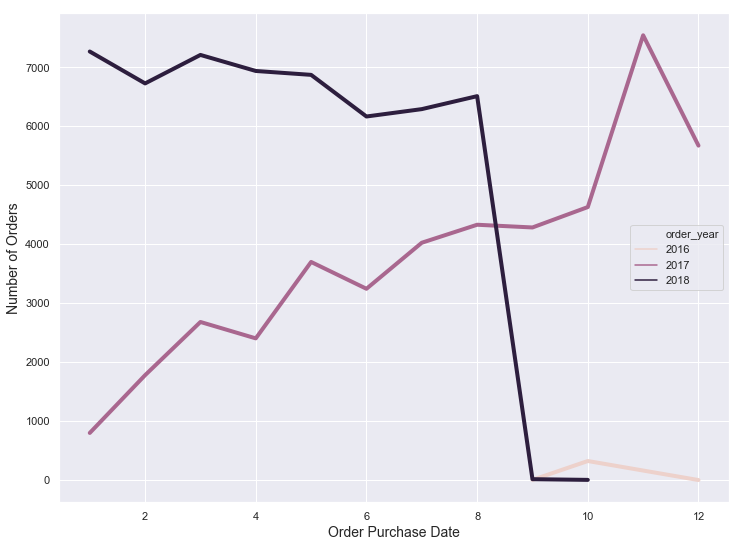

In [90]:
# Plot the order volumes by year and month

sns.set(style='darkgrid')

plt.figure(figsize=[12, 9])

sns.lineplot(x='order_month', y='order_id', lw=4, hue='order_year', data=order_groups_df)

plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14)

The data from 2018 in incomplete (available until August), and only three months' worth of data is available from 2017. But based on the available data, there doesn't appear to be a strong seasonality effect over months. 

### Let's take a look at some customer-level patterns

The `customer_id` that's available in the `olist_orders_dataset` file is *not* unique for each customer. The `olist_customers_dataset` file contains the unique identifier for each customer.

In [ ]:
# Read the file that contains the unique customer identifier

## -- INSERT CODE HERE -- ##


In [92]:
# Check the size (rows and columns of the dataframe)
cust_file_df.shape
cust_file_df.columns


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [93]:
# Let's keep only the following two columns: customer_id, customer_unique_id
cust_df = cust_file_df[['customer_id', 'customer_unique_id']]


In [94]:
cust_df.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


Merge the orders dataframe with the customer dataframe to append `customer_unique_id` to the orders data.

In [107]:
# Merge orders and cust dataframes
merged_df = pd.merge(orders_file_df, cust_df, on='customer_id', how='inner')




In [108]:
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_year,order_month,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017,10,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018,7,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018,8,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017,11,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018,2,72632f0f9dd73dfee390c9b22eb56dd6
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,2017,7,80bb27c7c16e8f973207a5086ab329e2
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017,4,36edbb3fb164b1f16485364b6fb04c73
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16,2017,5,932afa1e708222e5821dac9cd5db4cae
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23,2017,1,39382392765b6dc74812866ee5ee92a7
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29,2017,7,299905e3934e9e181bfb2e164dd4b4f8


Note that an `inner` join is fine here because customers that are present in one dataframe are all also present in the other dataframe.

**pandas** uses a similar structure like **SQL** for joining (merging) dataframes. Here's an analogous SQL query:

`CREATE TABLE orders as`

`SELECT a.*, b.*`

`FROM orders as a`

`JOIN cust as b`

`ON a.customer_id = b.customer_id;`

In [117]:
# Number of orders per customer
merged_df['customer_unique_id'].value_counts().mean()


1.0348089410589412

Another approach, to get the order counts by customer, is to use `groupby()`:

In [121]:
# Number of orders per customer using groupby
merged_df.groupby('customer_unique_id').size()


customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
0004bd2a26a76fe21f786e4fbd80607f    1
00050ab1314c0e55a6ca13cf7181fecf    1
00053a61a98854899e70ed204dd4bafe    1
0005e1862207bf6ccc02e4228effd9a0    1
0005ef4cd20d2893f0d9fbd94d3c0d97    1
0006fdc98a402fceb4eb0ee528f6a8d4    1
00082cbe03e478190aadbea78542e933    1
00090324bbad0e9342388303bb71ba0a    1
000949456b182f53c18b68d6babc79c1    1
000a5ad9c4601d2bbdd9ed765d5213b3    1
000bfa1d2f1a41876493be685390d6d3    1
000c8bdb58a29e7115cfc257230fb21b    1
000d460961d6dbfa3ec6c9f5805769e1    1
000de6019bb59f34c099a907c151d855    1
000e309254ab1fc5ba99dd469d36bdb4    1
000ec5bff359e1c0ad76a81a45cb598f    1
000ed48ceeb6f4bf8ad021a10a3c7b43    1
000fbf0473c10fc1ab6f8d2d286ce20c    1
0010a452c6d13139e50b57f19f52e04e    1
0010fb34b966d44409382af9e8fd5b77    1
001147e649a7b1afd577e873841632d

Alternatively, use `orders.groupby('customer_unique_id')['order_id'].count()`.

In [122]:
# Save these counts (number of orders) in a new dataframe

cust_orders = merged_df.groupby('customer_unique_id').size()



In [127]:
cust_orders = cust_orders.reset_index()

In [128]:
cust_orders.head()

,customer_unique_id,0
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [131]:
# Rename the columns

cust_orders.columns = ['customer_unique_id', 'orders']





In [132]:
cust_orders.columns

Index(['customer_unique_id', 'orders'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


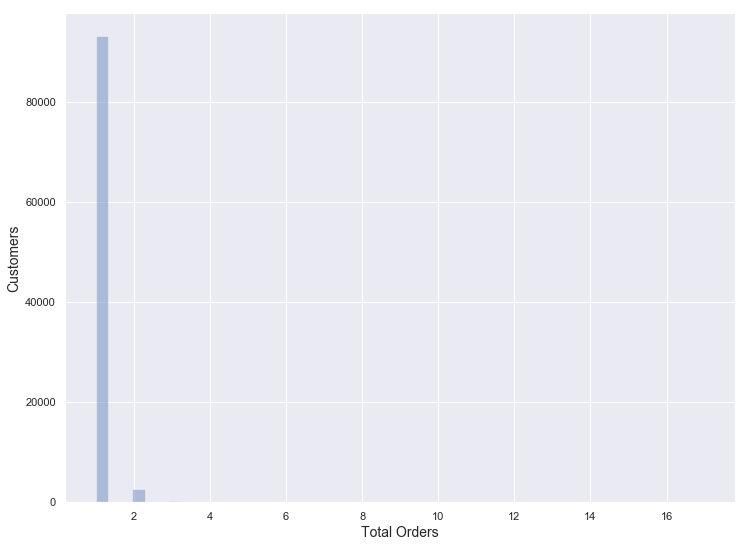

In [133]:
# Plot the number order volume (per customer)

sns.set(style='darkgrid')

plt.figure(figsize=[12, 9])

sns.distplot(cust_orders['orders'], kde=False)

plt.xlabel('Total Orders', fontsize=14)
plt.ylabel('Customers', fontsize=14);

Most customers ordered only once. There are some customers (a very few) who have ordered 16/17 times.

In [134]:
# Number of customers by their order volumne
cust_orders['orders'].value_counts()


1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
Name: orders, dtype: int64

In [135]:
# % of customers by their order volume

cust_orders['orders'].value_counts()/len(cust_orders)

1     0.968812
2     0.028565
3     0.002112
4     0.000312
5     0.000083
6     0.000062
7     0.000031
17    0.000010
9     0.000010
Name: orders, dtype: float64

## Export results

#### 1. Export data

##### Export in CSV format

In [137]:
csv_file = out + '\olist_orders.csv'

orders_file_df.to_csv(csv_file, index=False)


Use `index=False` to discard the dataframe (row) indices.

##### Export a zipped file

In [ ]:
csv_file_zipped = out + '\olist_purch_model_scores.csv.gz'



##### Export in JSON format

In [140]:
json_file = out + '\olist_purch_model_scores.json'

with open(json_file, 'w') as f:
    f.write(orders_file_df.to_json(orient='records', lines=True))

##### Read the JSON file

In [ ]:
df_in = pd.read_json(json_file, lines=True)

df_in.head()

#### 2. Export plots

##### Export a single plot

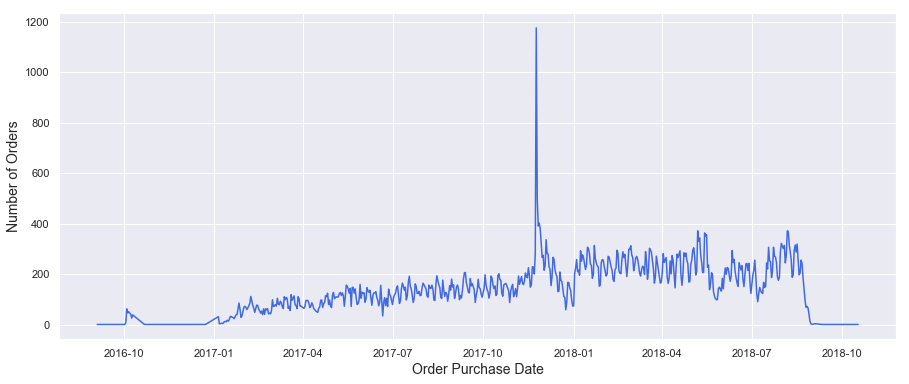

In [138]:
image_file = out + '\daily_order_volume.png'

sns.set(style='darkgrid')

# Adjust the plot size
plt.figure(figsize=[15, 6])

# Line plot
sns.lineplot(x=order_counts.index, y=order_counts.values, color='royalblue')

# Assign axis labels
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14)

# Export the plot
plt.savefig(image_file)

##### Export multiple plots

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

# File name where all plots will be stored
all_plots_file = out + '\olist_eda_plots.pdf'

# Plot 1
sns.set(style='darkgrid')
plt.figure(figsize=[12, 9])
plot1 = sns.lineplot(x=order_counts.index, y=order_counts.values, color='royalblue')
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14)

# Plot 2
plt.figure(figsize=[12, 9])
plot2 = sns.lineplot(x='order_month', y='order_id', hue='order_year', data=order_counts_by_month)
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14)

# Plot 3
plt.figure(figsize=[12, 9])
plot3 = sns.distplot(cust_orders['orders'], kde=False)
plt.xlabel('Total Orders', fontsize=14)
plt.ylabel('Customers', fontsize=14)

# Export all plots into the pdf file
with PdfPages(all_plots_file) as pdf:
    pdf.savefig(plot1.figure)
    pdf.savefig(plot2.figure)
    pdf.savefig(plot3.figure)